In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import os
from sklearn import preprocessing
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from numpy.linalg import norm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

sns.set_palette('flare')

In [121]:
#Here we are reading through the dataset and column type of get a general idea. 
df = pd.read_csv('marketing_campaign.csv', sep='\t')
dfEDA = df.copy() #Copying the dataframe for EDA
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [122]:
df.info() #Data frame information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Dealing with NA values

In [123]:
#Only the income column has the na values

df.columns[df.isna().any()].tolist()

['Income']

In [124]:
#Filled the na values with the mean of the column

mean_income = df['Income'].mean()
df['Income'].fillna(value = mean_income, inplace = True)

## Exploratory Data Analysis

In [125]:
dfEDA.shape

(2240, 29)

In [126]:
dfEDA.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [127]:
#Dropped both these columns because they weren't adding any value to the data.

dfEDA.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

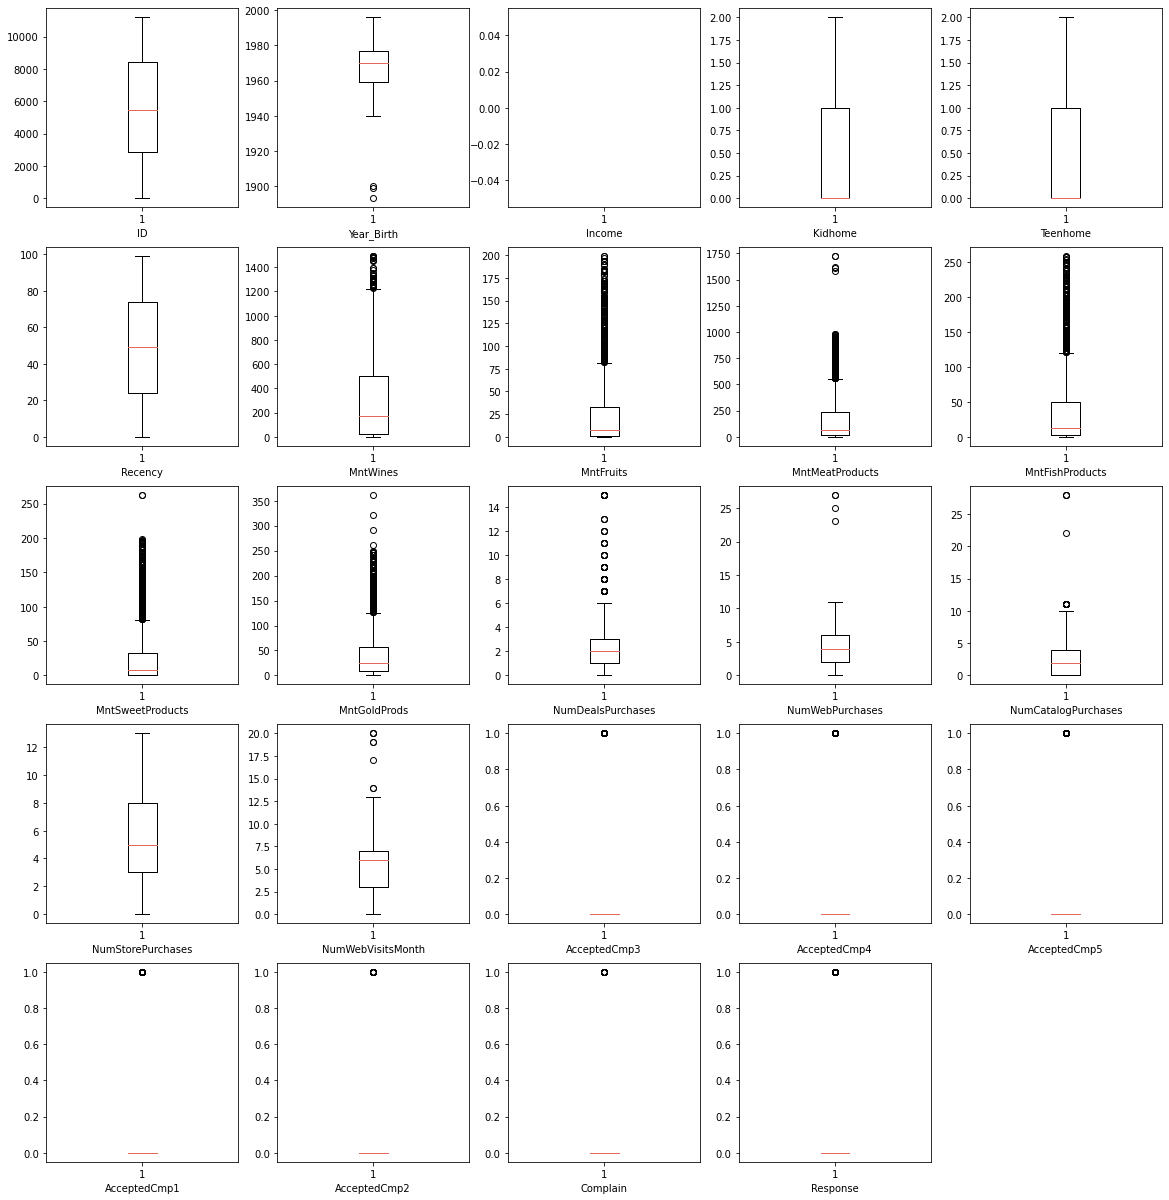

In [128]:
#Box plots for numerical columns. It gives a very good idea about the distribution of the data along with the outliers present

num_coln = dfEDA.select_dtypes(include=np.number).columns.tolist()
bins=10
j=1
fig = plt.figure(figsize = (20, 30))
for i in num_coln:
    plt.subplot(7,5,j)
    plt.boxplot(dfEDA[i])
    j=j+1
    plt.xlabel(i)
plt.show()

In [129]:
# Let's get the divion of customer based on Civil status
dfEDA['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [130]:
# Let's get the divion of customer based on Education level
dfEDA['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [131]:
#Checking the the individual counts of the separate columns by grouping on marital status and education

dfEDAgpb = dfEDA.copy()
gpp = dfEDAgpb.groupby(['Marital_Status','Education'])
gpp.first()

ID  Year_Birth   Income  Kidhome  Teenhome  \
Marital_Status Education                                                   
Absurd         Graduation   7734        1993  79244.0        0         0   
               Master       4369        1957  65487.0        0         0   
Alone          Graduation     92        1988  34176.0        1         0   
               Master        433        1958  61331.0        1         1   
               PhD          7660        1973  35860.0        1         1   
Divorced       2n Cycle     7829        1900  36640.0        1         0   
               Basic        5342        1976   9548.0        1         0   
               Graduation    965        1971  55635.0        0         1   
               Master       8180        1952  59354.0        1         1   
               PhD          7373        1952  46610.0        0         2   
Married        2n Cycle    10755        1976  23718.0        1         0   
               Basic         387        1976   7500.0        0         0   
               Graduation   1994        1983  17323.0        1         0   
               Master       6565        1949  76995.0        0         1   
               PhD          5324        1981  58293.0        1         0   
Single         2n Cycle     2278        1985  33812.0        1         0   
               Basic        1987        1987  21063.0        1         0   
               Graduation   5524        1957  58138.0        0         0   
               Master      10738        1951  49389.0        1         1   
               PhD          2114        1946  82800.0        0         0   
Together       2n Cycle    10401        1976  26326.0        0         0   
               Basic        8373        1979  24594.0        1         0   
               Graduation   4141        1965  71613.0        0         0   
               Master       7446        1967  62513.0        0         1   
               PhD          4855        1974  30351.0        1         0   
Widow          2n Cycle     3921        1952  28457.0        0         0   
               Basic         954        1960  22123.0        0         0   
               Graduation   8595        1973  42429.0        0         1   
               Master       1377        1954  44551.0        0         1   
               PhD          6518        1951  67680.0        0         1   
YOLO           PhD           492        1973  48432.0        0         1   

                          Dt_Customer  Recency  MntWines  MntFruits  \
Marital_Status Education                                              
Absurd         Graduation  19-12-2012       58       471        102   
               Master      10-01-2014       48       240         67   
Alone          Graduation  12-05-2014       12         5          7   
               Master      10-03-2013       42       534          5   
               PhD         19-05-2014       37        15          0   
Divorced       2n Cycle    26-09-2013       99        15          6   
               Basic       08-08-2012       31         0          1   
               Graduation  13-11-2012       34       235         65   
               Master      15-11-2013       53       233          2   
               PhD         29-10-2012        8        96         12   
Married        2n Cycle    02-09-2013       76         6          3   
               Basic       13-11-2012       59         6         16   
               Graduation  15-11-2013       11         5          5   
               Master      28-03-2013       91      1012         80   
               PhD         19-01-2014       94       173         43   
Single         2n Cycle    03-11-2012       86         4         17   
               Basic       25-09-2013       34         1         10   
               Graduation  04-09-2012       58       635         88   
               Master      29-08-2013       55        40          0   
               PhD         24-

from the group result we can say that, "Alone,YOLO,Absurd" count negligile compared to others.
Hence, merging it to one category named "Others"

In [132]:
dfEDA['Marital_Status'] = dfEDA['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Others')

Similary, we assumed 2nd Cycle as the another level of master's degree and Graduation as Bachelors.
Hence, replacing the value to respective category.

In [133]:
dfEDA['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)

In [134]:
#Adding a new age column based on the year of birth

dfEDA['Age'] = 2021 - dfEDA.Year_Birth.to_numpy()
dfEDA.drop('Year_Birth', axis=1, inplace=True)

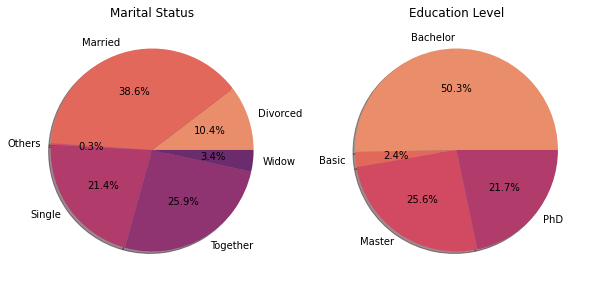

In [135]:
fig, ax = plt.subplots(1, 2, figsize = (10, 12))

# Marital Status
cust_count=dfEDA.groupby("Marital_Status").count()['Age']
label=dfEDA.groupby('Marital_Status').count()['Age'].index
ax[0].pie(cust_count, labels=label, shadow=True, autopct='%1.1f%%',radius=1)
ax[0].set_title('Marital Status')

# Education levels
cust_count = dfEDA.groupby("Education").count()['Age']
label = dfEDA.groupby('Education').count()['Age'].index
ax[1].pie(cust_count, labels=label, shadow=True, autopct='%1.1f%%',radius=1)
ax[1].set_title('Education Level')
plt.show()

Majority of the customers are married and have completed their Bachelors

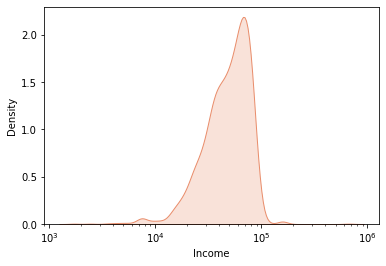

In [136]:
#Distribution of income levels

sns.kdeplot(data=dfEDA, x="Income", shade=True, log_scale=True,)
plt.show()


Above plot clearly state the income divison between 10000 to 100000.

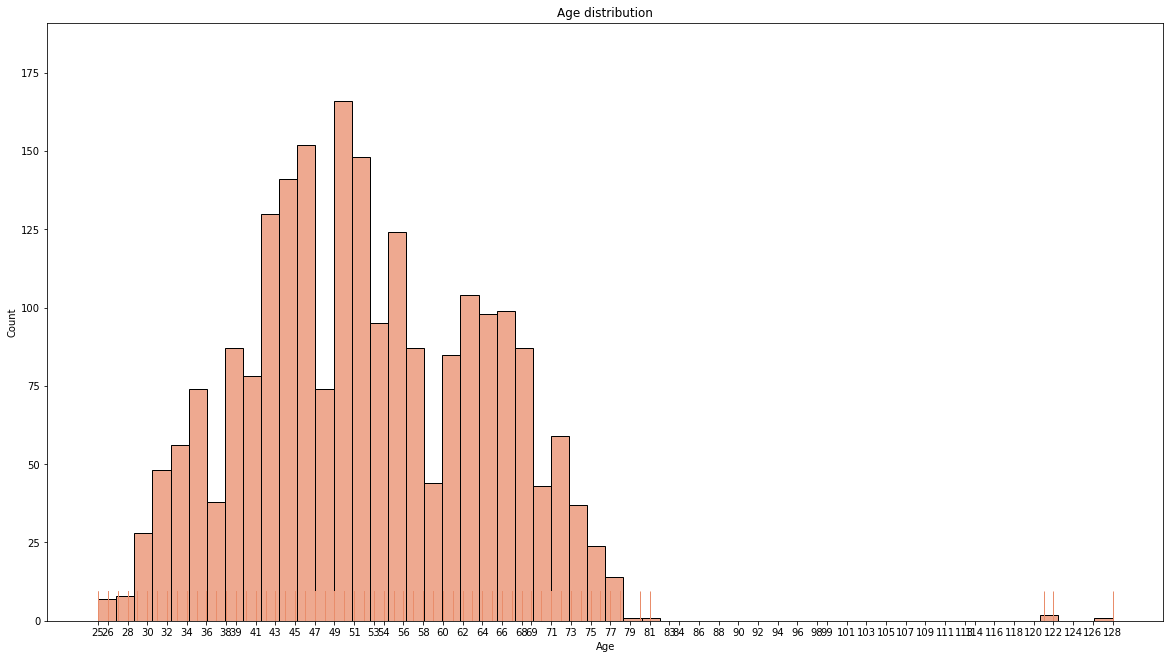

In [137]:
# Age Range

# Majority of the customers fall in the 40-50 age group
plt.figure(figsize=(20, 11))
plt.title('Age distribution')
ax = sns.histplot(dfEDA['Age'].sort_values(), bins=56)
sns.rugplot(data=dfEDA['Age'], height=.05)
plt.xticks(np.linspace(dfEDA['Age'].min(), dfEDA['Age'].max(), 56, dtype=int, endpoint = True))
plt.show()

In [138]:
dfEDA[(dfEDA['Age']>100)]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
192,7829,Master,Divorced,36640.0,1,0,26-09-2013,99,15,6,...,2,5,0,0,0,0,0,1,0,121
239,11004,Master,Single,60182.0,0,1,17-05-2014,23,8,0,...,2,4,0,0,0,0,0,0,0,128
339,1150,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,...,4,1,0,0,1,0,0,0,0,122


In [139]:
#Dropped the people with age over 100
dfEDA.drop(dfEDA[(dfEDA['Age']>100)].index,inplace=True)

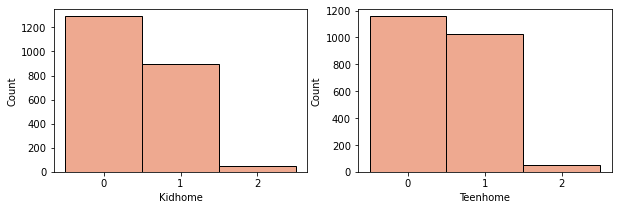

In [140]:
#In general, customers tend to have either 0/1 kids and teens at home

plt.figure(figsize=(10,3))
# Kid Home
plt.subplot(121)
sns.histplot(data=dfEDA, x='Kidhome', stat="count",discrete=True)
plt.xticks([0, 1, 2])

#Teen Home
plt.subplot(122)
sns.histplot(data=dfEDA, x='Teenhome', stat="count",discrete=True)
plt.xticks([0, 1, 2])
plt.show()

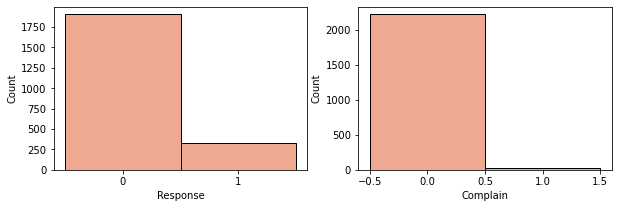

In [141]:
# In general, customers are complaining less and have responded less in the last campaign

plt.figure(figsize=(10,3))

# Response distribution & Complain
plt.subplot(121)
sns.histplot(data=dfEDA, x='Response', stat="count", discrete=True, palette="pastel")
plt.xticks([0, 1])

# Income Range
plt.subplot(122)
sns.histplot(data=dfEDA, x='Complain', stat="count", discrete=True, palette="pastel")
plt.show()

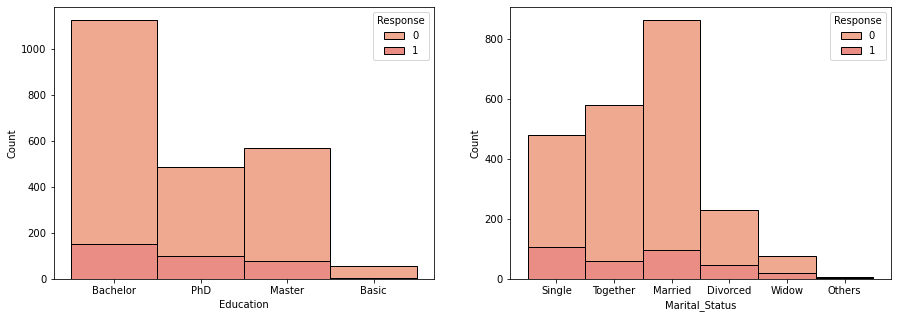

In [142]:
# Education & Response

# Customers who have responded have a higher probability of being bachelors and also either tend to be single/married

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=dfEDA, x="Education", hue="Response", multiple="stack", stat="count")

# Marital_Status & Response
plt.subplot(122)
sns.histplot(data=dfEDA, x="Marital_Status", hue="Response",stat="count", multiple="stack")
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Density'>

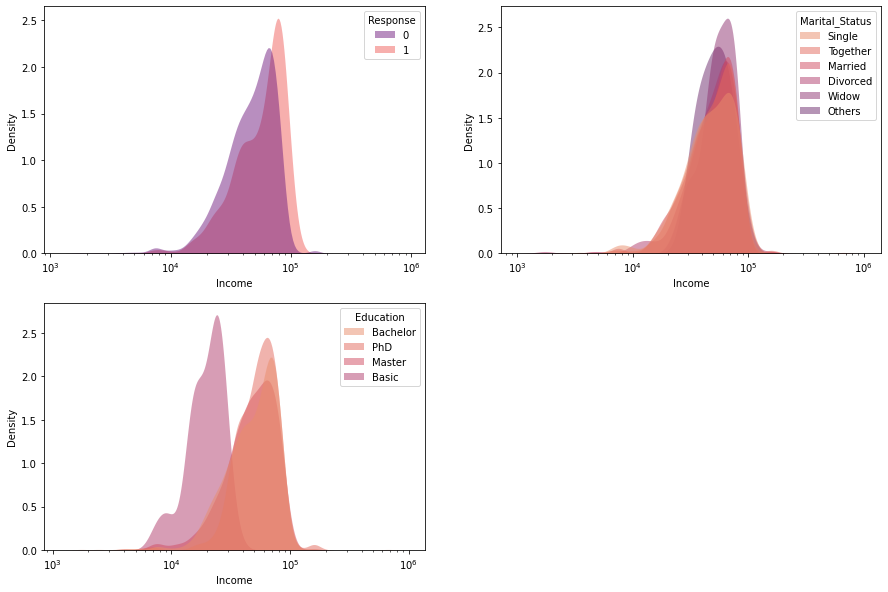

In [143]:
plt.figure(figsize=(15,10))
plt.xlabel('Income')

plt.subplot(221)
sns.kdeplot(
   data=dfEDA, x="Income", hue="Response", log_scale= True,
   fill=True, common_norm=False,palette="magma",
   alpha=.5, linewidth=0,
)


# Marital_Status
plt.subplot(222)
sns.kdeplot(
   data=dfEDA, x="Income", hue="Marital_Status", log_scale= True,
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)

#Education
plt.subplot(223)
sns.kdeplot(
   data=dfEDA, x="Income", hue="Education", log_scale= True,
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)

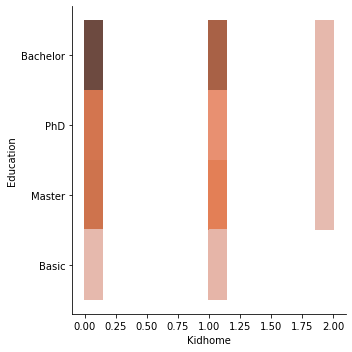

In [144]:
sns.displot(data=dfEDA,x="Kidhome",y="Education")

In [145]:
#Combined the amount spent on different products to calculate the total expenses

dfEDA['Expenses'] = dfEDA['MntWines'] + dfEDA['MntFruits'] + dfEDA['MntMeatProducts'] + dfEDA['MntFishProducts'] + dfEDA['MntSweetProducts'] + dfEDA['MntGoldProds']
dfEDA['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

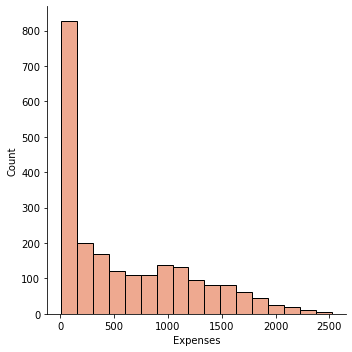

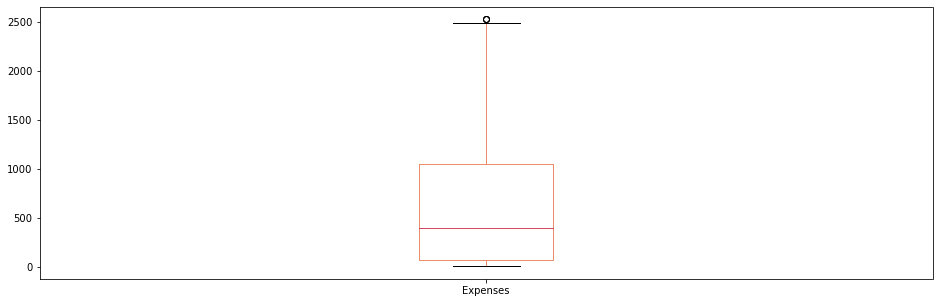

In [146]:
# In general, customers have spent mostly in the range of $0-100 but a few customers have spent higher amounts up to $2500

sns.displot(dfEDA["Expenses"])
plt.show()
dfEDA["Expenses"].plot.box(figsize=(16,5))
plt.show()

In [147]:
#Combined the responses in the different campaigns into 1 single response

dfEDA['TotalAcceptedCmp'] = dfEDA['AcceptedCmp1'] + dfEDA['AcceptedCmp2'] + dfEDA['AcceptedCmp3'] + dfEDA['AcceptedCmp4'] + dfEDA['AcceptedCmp5']
dfEDA['TotalAcceptedCmp'].value_counts()

0    1775
1     324
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64

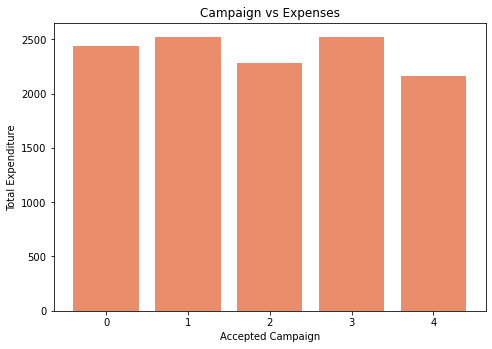

In [148]:
#There is not much difference in the expenses of the customers as the number of campagins increase

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dfEDA['TotalAcceptedCmp'],dfEDA['Expenses'])
plt.title('Campaign vs Expenses')
ax.set_ylabel('Total Expenditure')
ax.set_xlabel('Accepted Campaign')

plt.show()

In [149]:
Edu_df = dfEDA.groupby(by = ['Education']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum',
                                              'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()

Edu_df.head()

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Bachelor,320371,34683,202284,48630,35351,57307
1,Basic,391,600,618,921,654,1233
2,Master,163446,13884,89112,21502,14784,24339
3,PhD,195830,9600,81379,12886,9764,15479


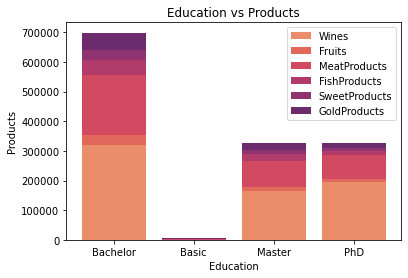

In [150]:
#In general, across all education levels wine and meat products are given more prefernce over other products

plt.bar(Edu_df['Education'], Edu_df['MntWines'])
plt.bar(Edu_df['Education'], Edu_df['MntFruits'], bottom=Edu_df['MntWines'])
plt.bar(Edu_df['Education'], Edu_df['MntMeatProducts'], bottom=Edu_df['MntWines']+Edu_df['MntFruits'])
plt.bar(Edu_df['Education'], Edu_df['MntFishProducts'], bottom=Edu_df['MntWines']+Edu_df['MntFruits']+Edu_df['MntMeatProducts'])
plt.bar(Edu_df['Education'], Edu_df['MntSweetProducts'], bottom=Edu_df['MntWines']+Edu_df['MntFruits']+Edu_df['MntMeatProducts']+Edu_df['MntFishProducts'])
plt.bar(Edu_df['Education'], Edu_df['MntGoldProds'], bottom=Edu_df['MntWines']+Edu_df['MntFruits']+Edu_df['MntMeatProducts']+Edu_df['MntFishProducts']+Edu_df['MntSweetProducts'])
plt.xlabel("Education")
plt.ylabel("Products")
plt.legend(["Wines", "Fruits", "MeatProducts", "FishProducts", "SweetProducts", "GoldProducts"])
plt.title("Education vs Products")
plt.show()

## Feature Engineering

In [151]:
#Based on the most recent record, getting the date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
dates = []
for i in df['Dt_Customer']:
    dates.append(i)

#Modified the Customer_For column such that it will show the most recent customer enrollment relative to the latest customer 
#that was enrolled
days = []
d1 = max(dates)
print(d1)
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df['Customer_For'] = df['Customer_For'].apply(lambda x: x.days)
df.head()

2014-12-06 00:00:00


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,971
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,125
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,472
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,65
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,321


In [152]:
# Age based on the year of birth
df['Age'] = 2021 - df['Year_Birth']

#Total Amount Spent
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Married or Alone?
df["Married_Alone"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", 
                                                    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", 
                                                    "Single":"Alone",})

#Number of children
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Number of people in the family
df["Family_Size"] = df["Married_Alone"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Whether he/she is a parent
df["Parent"] = np.where(df.Children> 0, 1, 0)

#Renaming to get better understanding of the columns
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits",
                          "MntMeatProducts":"Meat","MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Renaming values within the education column
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", 
                                             "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

col_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth']
df = df.drop(col_drop, axis=1)

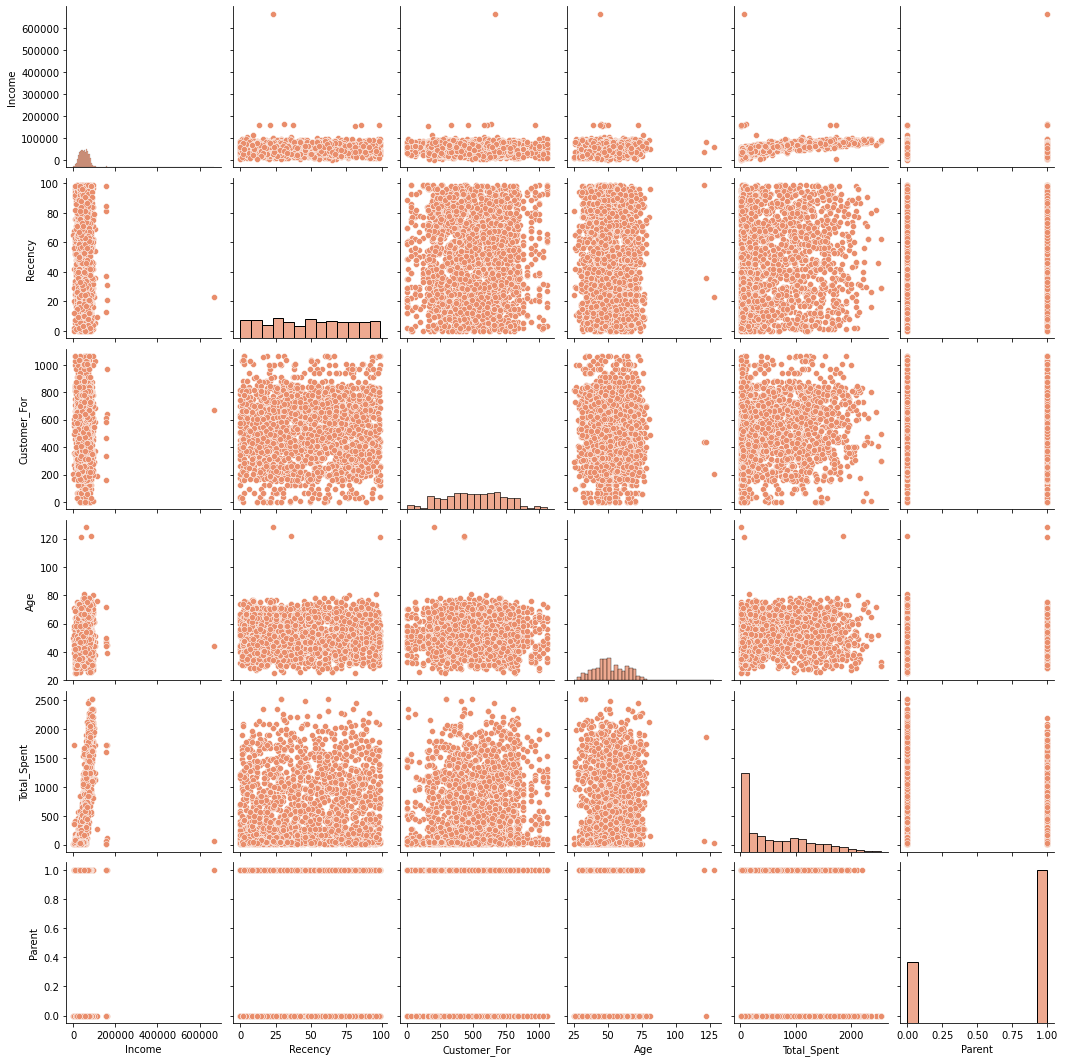

In [153]:
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Total_Spent", "Parent"]
sns.pairplot(df[To_Plot], palette= (["#682F2F","#F3AB60"]))

<AxesSubplot:>

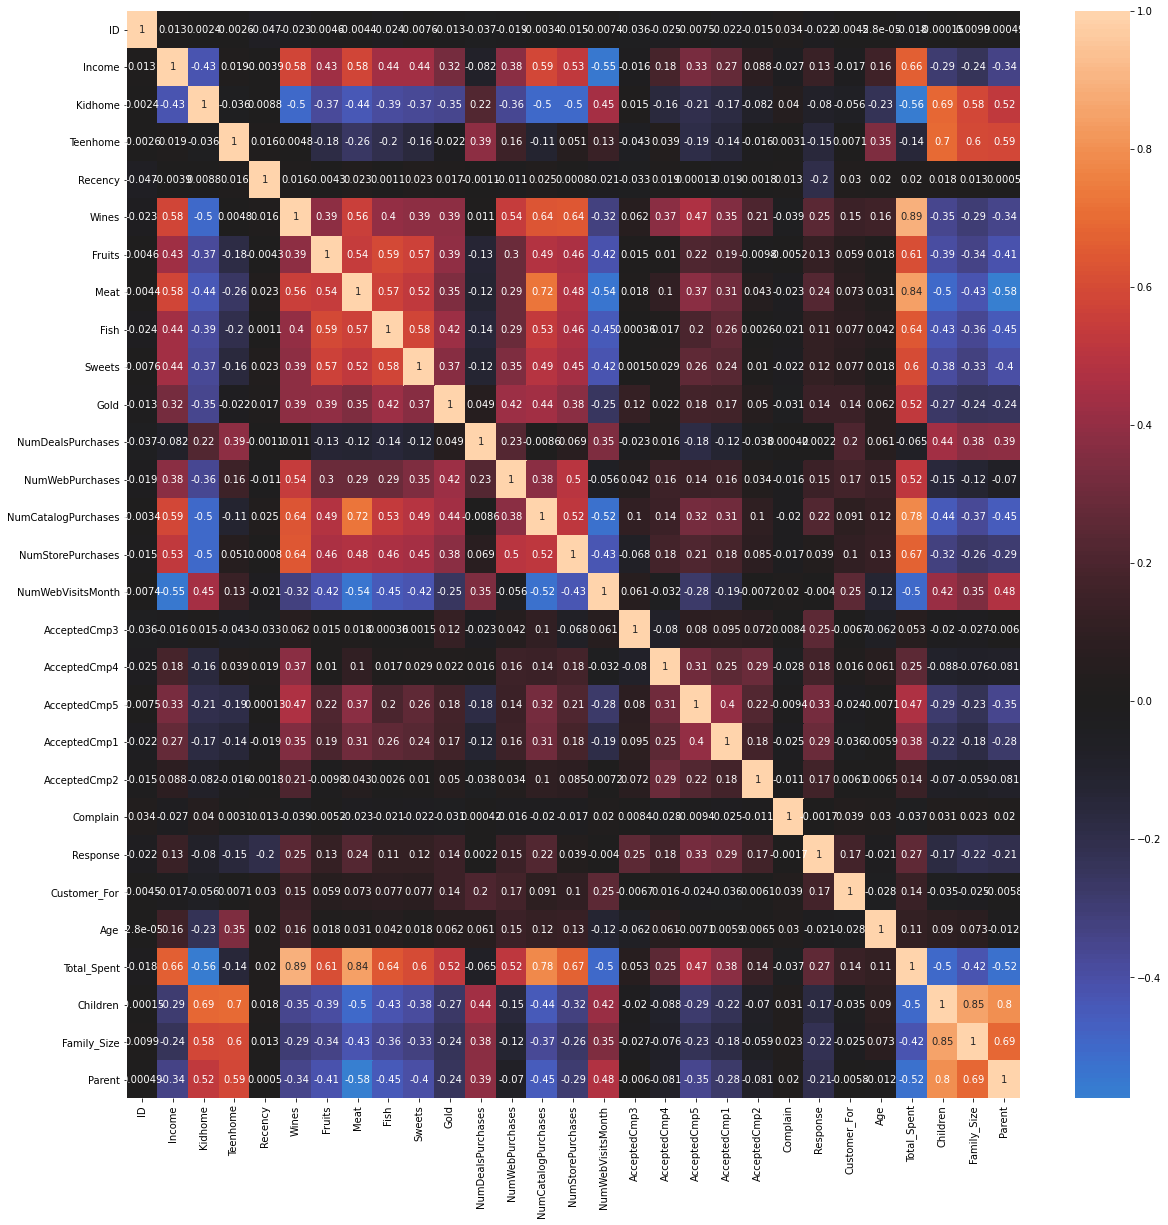

In [154]:
#Heatmap which shows the correlation between different numerical columns

corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

In [155]:
#OHE for categorical columns
df_ohe = pd.get_dummies(df, columns=["Education","Married_Alone"] )
df_ohe.head()

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Age,Total_Spent,Children,Family_Size,Parent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Married_Alone_Alone,Married_Alone_Partner
0,5524,58138.0,0,0,58,635,88,546,172,88,...,64,1617,0,1,0,1,0,0,1,0
1,2174,46344.0,1,1,38,11,1,6,2,1,...,67,27,2,3,1,1,0,0,1,0
2,4141,71613.0,0,0,26,426,49,127,111,21,...,56,776,0,2,0,1,0,0,0,1
3,6182,26646.0,1,0,26,11,4,20,10,3,...,37,53,1,3,1,1,0,0,0,1
4,5324,58293.0,1,0,94,173,43,118,46,27,...,40,422,1,3,1,0,1,0,0,1


## Scaling

In [156]:
#Scaled the feature so that one feature is not unnecessarilly given more weightage because of larger range

cols_to_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'ID']
df_ohe = df_ohe.drop(cols_to_del, axis=1)
scaler = StandardScaler()
scaler.fit(df_ohe)
scaled_df = pd.DataFrame(scaler.transform(df_ohe),columns= df_ohe.columns )

In [157]:
scaled_df.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Age,Total_Spent,Children,Family_Size,Parent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Married_Alone_Alone,Married_Alone_Partner
0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,0.985345,1.679417,-1.264505,-1.759115,-1.584605,0.993769,-0.786446,-0.360002,1.346874,-1.346874
1,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,1.235733,-0.961275,1.396361,0.446548,0.631072,0.993769,-0.786446,-0.360002,1.346874,-1.346874
2,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,0.317643,0.282673,-1.264505,-0.656283,-1.584605,0.993769,-0.786446,-0.360002,-0.742460,0.742460
3,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-1.268149,-0.918094,0.065928,0.446548,0.631072,0.993769,-0.786446,-0.360002,-0.742460,0.742460
4,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,-1.017761,-0.305254,0.065928,0.446548,0.631072,-1.006270,1.271543,-0.360002,-0.742460,0.742460


The total explained variance ratio is: 0.73


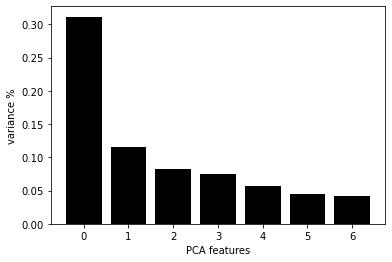

In [158]:
#PCA with number of components as 7 is capturing decent variance

pca = PCA(n_components=7)
principalComponents = pca.fit_transform(scaled_df)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)
print('The total explained variance ratio is:', round(sum(pca.explained_variance_ratio_),2))

In [159]:
pca_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3","col4","col5","col6","col7"]))
pca_df.head()

,col1,col2,col3,col4,col5,col6,col7
0,5.082816,-0.742594,1.518623,2.119989,1.389592,-0.835313,0.047406
1,-2.829137,-0.680120,1.541279,0.827220,-2.704869,0.958741,0.135301
2,2.568566,-0.457966,-1.393304,0.472967,-0.375349,-1.022222,0.992190
3,-2.608829,-1.254464,-1.801381,0.670010,-1.010835,-0.221701,-0.944486
4,-0.700035,0.701421,-0.755129,-1.098127,0.541182,0.285627,-2.002366


## DBSCAN

In [160]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(pca_df)

DBSCAN()

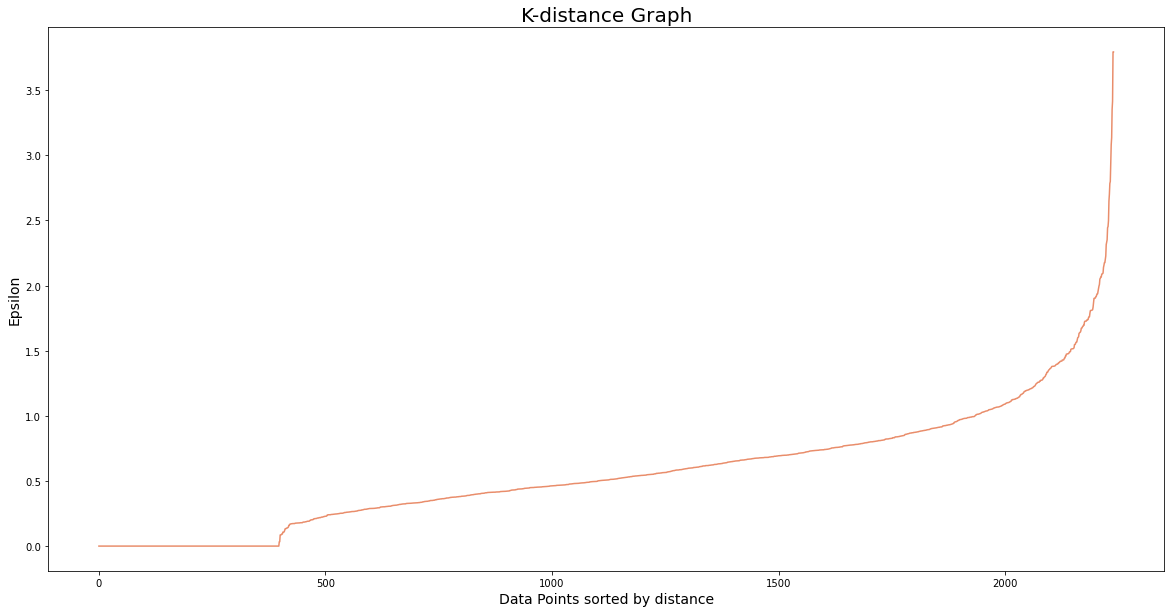

In [161]:
df1 = df

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(pca_df)
distances, indices = nbrs.kneighbors(pca_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [162]:
#DBSCAN isn't giving an even distribution of clusters so we have decided to pursue KMeans

from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=1.2,min_samples=60)
dbscan_opt.fit(pca_df)

df1['DBSCAN_opt_labels']=dbscan_opt.labels_
df1['DBSCAN_opt_labels'].value_counts()

-1    2027
 0     134
 1      79
Name: DBSCAN_opt_labels, dtype: int64

The split of clusters isn't distributed correctly so we'll move on to trying Gaussian Mixture Model

## Gaussian Mixture Model

**Cluster analysis using *Gaussian Mixture Model***.

Gaussian Mixture Model is used in case of unlabeled data and it counts variance in account unlike K-means.
The main between k-means and Gaussian mixture models is that the K-means performs hard classification 
whereas the GMM performs soft classification. In other words, K-means only gives information about the data and to
which cluster the data belongs but will not provide the probabilities that a given data point belongs
to each of the possible clusters.

GMM has two steps:

1. Expectation
2. Maximization

In [163]:
gmm = GaussianMixture(n_components=5, covariance_type='diag', max_iter=1000, random_state=42).fit(pca_df)
labels = gmm.predict(pca_df)

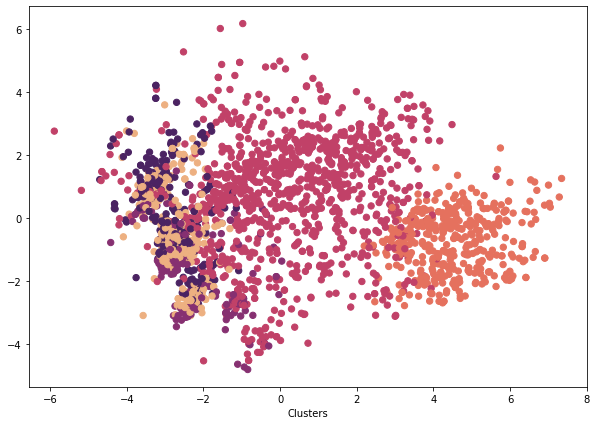

In [164]:
#Plot the graph do know the around which the data is clustered more.

fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111, label=labels)
ax.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], s=40, c=labels, marker="o",cmap='flare')
plt.xlabel('Clusters')
plt.show()

In [165]:
def SelBest(arr:list, X:int)->list:
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [166]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=50
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(pca_df) 
        labels=gmm.predict(pca_df)
        sil=metrics.silhouette_score(pca_df, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/10)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

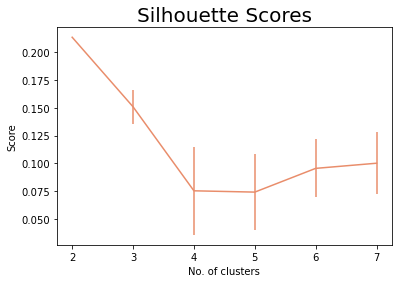

In [167]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("No. of clusters")
plt.ylabel("Score")

We aren't getting the appropriate cluster splits with Gaussian Mixture Model after testing for different PCA components

## KMeans Modeling

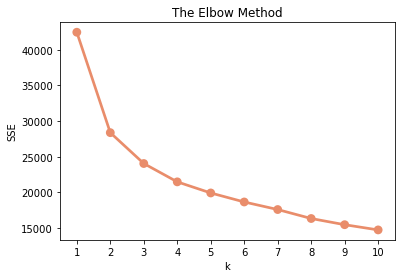

In [111]:
#Added the data generated after PCA as the input to the KMeans model and plotted the SSE line chart with respect to the number
#of clusters

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [112]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
AC_df = AC.fit_predict(pca_df)
pca_df["Clusters"] = AC_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= AC_df
df.head()

,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,Response,Customer_For,Age,Total_Spent,Married_Alone,Children,Family_Size,Parent,DBSCAN_opt_labels,Clusters
0,5524,Graduate,58138.0,0,0,58,635,88,546,172,...,1,971,64,1617,Alone,0,1,0,-1,2
1,2174,Graduate,46344.0,1,1,38,11,1,6,2,...,0,125,67,27,Alone,2,3,1,-1,0
2,4141,Graduate,71613.0,0,0,26,426,49,127,111,...,0,472,56,776,Partner,0,2,0,-1,2
3,6182,Graduate,26646.0,1,0,26,11,4,20,10,...,0,65,37,53,Partner,1,3,1,0,0
4,5324,Postgraduate,58293.0,1,0,94,173,43,118,46,...,0,321,40,422,Partner,1,3,1,-1,0


## Analysis of the Segments

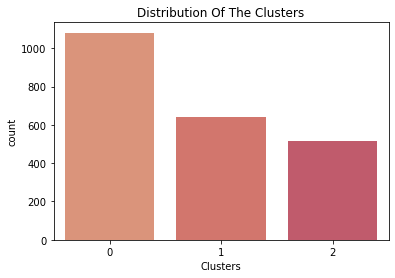

In [113]:
#Cluster 0 has the highest number of customers

pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [114]:
#Calculating percentage spend on various products based on the total amount spent

df['Wines%'] = (df['Wines']/df['Total_Spent'])*100
df['Fruits%'] = (df['Fruits']/df['Total_Spent'])*100
df['Meat%'] = (df['Meat']/df['Total_Spent'])*100
df['Fish%'] = (df['Fish']/df['Total_Spent'])*100
df['Sweets%'] = (df['Sweets']/df['Total_Spent'])*100
df['Gold%'] = (df['Gold']/df['Total_Spent'])*100

In [115]:
df3 = df.groupby(['Clusters','Education']).count()[['Income','Kidhome']]
df3 = df3.reset_index(level=[0,1])
df3= df3.drop('Kidhome', axis = 1)
df3 = df3.rename(columns = {'Income': 'Education Counts'})
df3

,Clusters,Education,Education Counts
0,0,Graduate,497
1,0,Postgraduate,415
2,0,Undergraduate,169
3,1,Graduate,382
4,1,Postgraduate,259
5,2,Graduate,248
6,2,Postgraduate,182
7,2,Undergraduate,88


In [116]:
df2 = df.groupby(['Clusters','Married_Alone']).count()[['Income','Kidhome']]
df2 = df2.reset_index(level=[0,1])
df2= df2.drop('Kidhome', axis = 1)
df2 = df2.rename(columns = {'Income': 'Marital Status Counts'})
df2

,Clusters,Married_Alone,Marital Status Counts
0,0,Alone,386
1,0,Partner,695
2,1,Alone,209
3,1,Partner,432
4,2,Alone,201
5,2,Partner,317


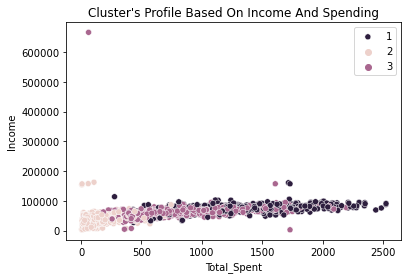

In [117]:
#A scatter plot of the total money spent and income split by the 3 clusters

pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend([1,2,3])
plt.show()

[Text(0.5, 1.0, 'Clustering based on Marital Status')]

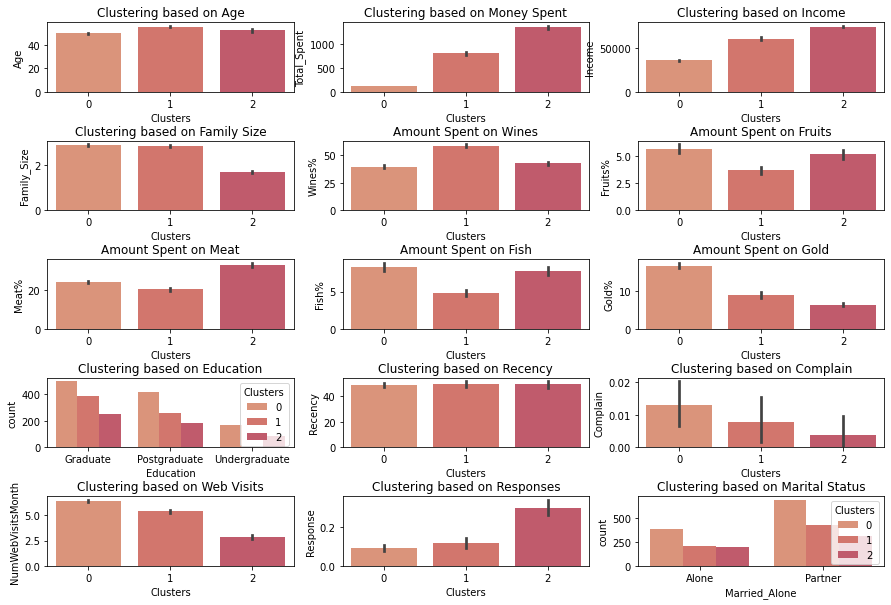

In [119]:
#Comparison of the different clusters based on various attributes

fig, axes = plt.subplots(5, 3, figsize=(15, 10))
plt.subplots_adjust(hspace = 0.7)

sns.barplot(x='Clusters',y='Age',data=df, ax=axes[0, 0]).set(title='Clustering based on Age')
sns.barplot(x='Clusters',y='Total_Spent',data=df, ax = axes[0, 1]).set(title='Clustering based on Money Spent')
sns.barplot(x='Clusters',y='Income',data=df, ax = axes[0, 2]).set(title='Clustering based on Income')
sns.barplot(x='Clusters',y='Family_Size',data=df, ax = axes[1, 0]).set(title='Clustering based on Family Size')
sns.barplot(x='Clusters',y='Wines%',data=df, ax = axes[1,1]).set(title='Amount Spent on Wines')
sns.barplot(x='Clusters',y='Fruits%',data=df, ax = axes[1,2]).set(title='Amount Spent on Fruits')
sns.barplot(x='Clusters',y='Meat%',data=df, ax = axes[2,0]).set(title='Amount Spent on Meat')
sns.barplot(x='Clusters',y='Fish%',data=df, ax = axes[2,1]).set(title='Amount Spent on Fish')
sns.barplot(x='Clusters',y='Gold%',data=df, ax = axes[2,2]).set(title='Amount Spent on Gold')
sns.countplot(x="Education", hue="Clusters", data=df,ax = axes[3,0]).set(title='Clustering based on Education')
sns.barplot(x='Clusters',y='Recency',data=df, ax = axes[3,1]).set(title='Clustering based on Recency')
sns.barplot(x='Clusters',y='Complain',data=df, ax = axes[3,2]).set(title='Clustering based on Complain')
sns.barplot(x='Clusters',y='NumWebVisitsMonth',data=df, ax = axes[4,0]).set(title='Clustering based on Web Visits')
sns.barplot(x='Clusters',y='Response',data=df, ax = axes[4,1]).set(title='Clustering based on Responses')
sns.countplot(x="Married_Alone", hue="Clusters", data=df, ax = axes[4,2]).set(title='Clustering based on Marital Status')